In [1]:
import pandas as pd
import seesaw.user_data_analysis
import importlib
importlib.reload(seesaw.user_data_analysis)
from seesaw.user_data_analysis import *

In [2]:
accept_df = pd.concat([pd.read_parquet('./time_view_v3.parquet'), pd.read_parquet('./time_view_v4.parquet')], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: './time_view_v3.parquet'

In [11]:
accept_df = accept_df[accept_df.accepted <= 10] 

In [116]:
accept_df[['session_id', 'uname']].apply(lambda x : x.session_id if not x.uname else x.uname, axis=1)

0       siva
1       siva
2       siva
3       siva
4       siva
        ... 
1680     NaN
1681     NaN
1682     NaN
1683     NaN
1684     NaN
Length: 1628, dtype: object

In [110]:
accept_df.groupby(['session_id']).size()

session_id
DRegLtqCwD0bbEars57isv1HWhdKjQCr    88
M0B2txZnhIJxrIm82kK4G10tKYQjyREF    88
Oe6iCdHDCbY75RBXP1JxC1Li5GZb5hoF    11
P6xfgQcyQ02o27zb7poR8FrEzOOJohoK    88
Ppvjj8tAMWhOdCS4ROBARz2HF0j32I97    77
                                    ..
yulfbzuqtu                          11
yuxjgolnul                          11
zaRD70psjG6Z9sCtOuxrbyMN1z6zrBzr    77
zvnvuryyji                          11
zyNm1QmrZQ6My4JJakaaw6jFKKYR7OKX    72
Length: 84, dtype: int64

In [12]:
qaccept_df = accept_df.groupby(['qkey','mode','accepted']).elapsed_time.apply(bootstrap_stat).reset_index()
qaccept_df = qaccept_df.assign(grp=qaccept_df[['mode', 'accepted']].apply(tuple,axis=1))

In [9]:
from plotnine import *

4

In [78]:
codes = {
    'pc':dict(dataset='bdd', qstr='police cars', 
                description='''Police vehicles that have lights and some marking related to police. ''',
                negative_description='''Sometimes private security vehicles or ambulances look like police cars but should not be included'''),
    'dg':dict(dataset='bdd', qstr='A - dogs'),
    'cd':dict(dataset='bdd', qstr='C - car with open doors', 
                description='''Any vehicles with any open doors, including open trunks in cars, and rolled-up doors in trucks and trailers.''',
                negative_description='''We dont count rolled down windows as open doors'''),
    'wch':dict(dataset='bdd', qstr='B - wheelchairs',
                description='''We include wheelchair alternatives such as electric scooters for the mobility impaired. ''',
                negative_description='''We do not include wheelchair signs or baby strollers'''),
    'mln':dict(dataset='coco', qstr='D - melon', 
                description='''We inclulde both cantaloupe (orange melon) and honeydew (green melon), whole melons and melon pieces. ''',
                negative_description='''We dont include any other types of melon, including watermelons, papaya or pumpkins, which can look similar. 
                If you cannot tell whether a fruit piece is really from melon don't sweat it and leave it out.'''),
    'spn':dict(dataset='coco', qstr='E - spoons', 
                description='''We include spoons or teaspons of any material for eating. ''', 
                negative_description='''We dont include the large cooking or serving spoons, ladles for soup, or measuring spoons.'''),
    'dst':dict(dataset='objectnet', qstr='F - dustpans',
                description='''We include dustpans on their own or together with other tools, like brooms, from any angle.''',
                negative_description='''We dont include brooms alone'''),
    'gg':dict(dataset='objectnet', qstr='G - egg cartons',
                description='''These are often made of cardboard or styrofoam. We include them viewed from any angle.''', 
                negative_description='''We dont include the permanent egg containers that come in the fridge''')
}

In [79]:
qaccept_df = qaccept_df.assign(qstr=qaccept_df.qkey.map(lambda x : codes[x]['qstr']))

In [80]:
qaccept_df = qaccept_df[~qaccept_df.qkey.isin(['pc'])]

In [81]:
qaccept_df = qaccept_df.assign(method=qaccept_df['mode'].map(lambda m : {'pytorch': 'this work', 'default':'baseline'}[m]))

In [82]:
show_minutes = lambda x : f'{int(x/60):d}'

In [108]:
qaccept_df

,qkey,mode,accepted,level_3,lower,med,mean,high,confidence_level,n,grp,qsrt,qstr,method
0,cd,default,0,0,0.000000,0.000000,0.000000,0.000000,0.95,13,"(default, 0)",car with open doors,C - car with open doors,baseline
1,cd,default,1,0,40.192141,51.063000,69.901746,94.085000,0.95,13,"(default, 1)",car with open doors,C - car with open doors,baseline
2,cd,default,2,0,56.421717,106.931500,117.527117,149.804176,0.95,10,"(default, 2)",car with open doors,C - car with open doors,baseline
3,cd,default,3,0,150.931717,222.846036,226.927334,340.303000,0.95,8,"(default, 3)",car with open doors,C - car with open doors,baseline
4,cd,default,4,0,218.503886,283.320000,291.841137,360.000000,0.95,7,"(default, 4)",car with open doors,C - car with open doors,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,wch,pytorch,6,0,66.674500,83.291000,87.486661,96.137941,0.95,12,"(pytorch, 6)",wheelchairs,B - wheelchairs,this work
172,wch,pytorch,7,0,75.836000,91.060159,100.260995,112.652871,0.95,12,"(pytorch, 7)",wheelchairs,B - wheelchairs,this work
173,wch,pytorch,8,0,85.995000,96.314659,108.180911,118.468871,0.95,12,"(pytorch, 8)",wheelchairs,B - wheelchairs,this work
174,wch,pytorch,9,0,92.053500,110.922159,118.876161,126.351788,0.95,12,"(pytorch, 9)",wheelchairs,B - wheelchairs,this work


In [107]:
qaccept_df.groupby(['session_id', 'user', 'qkey']).size()

KeyError: 'session_id'

/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


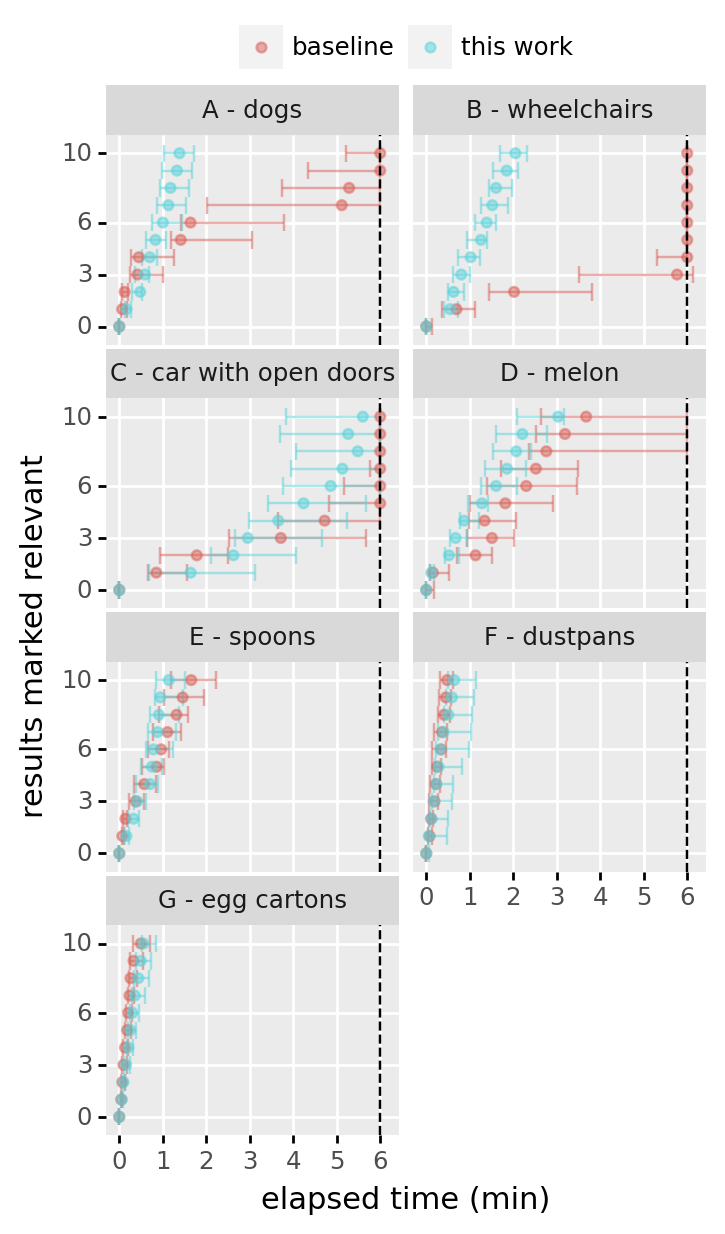

<ggplot: (8765356674850)>

In [101]:
plot = ( ggplot(qaccept_df) + 
     geom_errorbarh(aes(y='accepted', xmin='lower', xmax='high', 
                       group='grp', color='method'), height=1., alpha=.5, position='identity', show_legend=False) +
     geom_point(aes(y='accepted', x='med', group='grp', color='method'), alpha=.5, position='identity') +
#      geom_text(aes(y='accepted', x='high', label='n',
#                     group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +
     facet_wrap(['qstr'], ncol=2, ) +
     scale_x_continuous(breaks=[0, 60, 120, 180, 240, 300, 360], labels=lambda a : list(map(show_minutes,a)) )+
     scale_y_continuous(breaks=[0, 3, 6, 10]) +
     xlab('elapsed time (min)') +
     ylab('results marked relevant') + 
     annotate('vline', xintercept=6*60, linetype='dashed') +
#      annotate('text', label=360, x=360,y=0, va='top')
     theme(legend_position='top', legend_direction='horizontal', legend_title=element_blank(), legend_box_margin=0,
          legend_margin=0, plot_margin=0, panel_grid_minor=element_blank(), figure_size=(3,5), )
)
plot

In [84]:
import matplotlib.pyplot as plt

/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


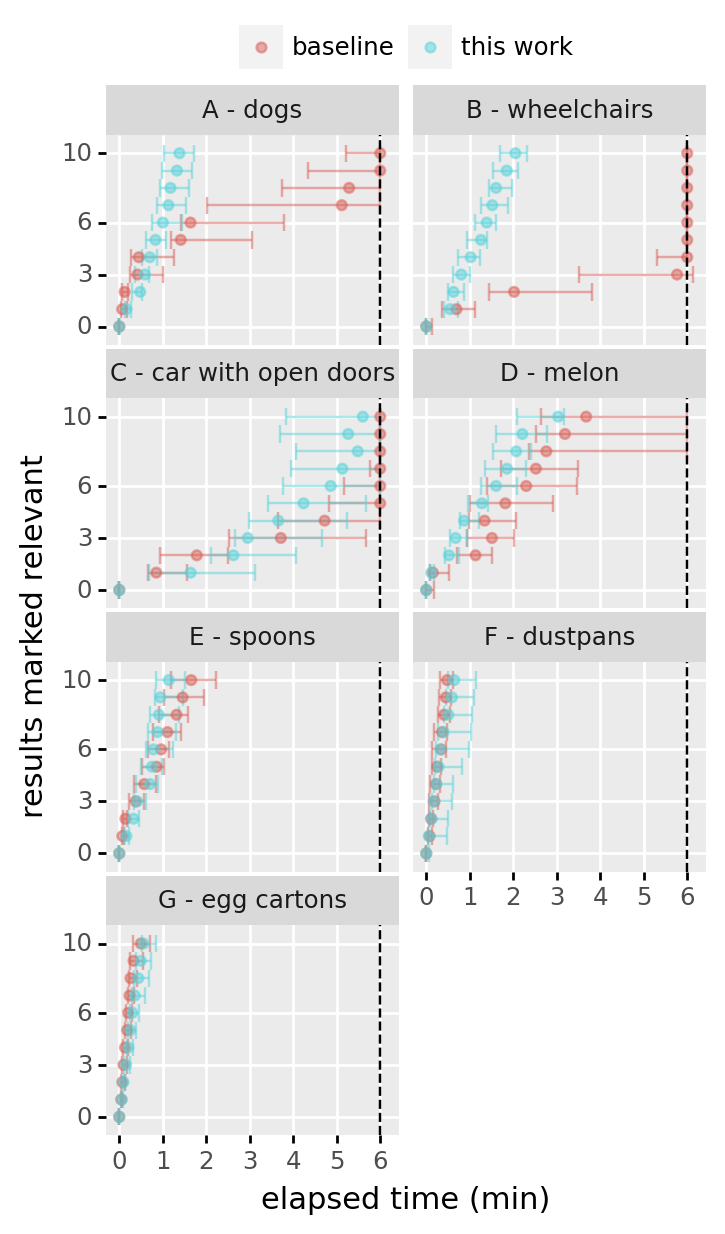

In [102]:
f2 = plot.draw()

In [96]:
#type(f2)

In [106]:
f2.savefig('./user_study.pdf', bbox_inches='tight', dpi=200)

In [104]:
import PIL.Image

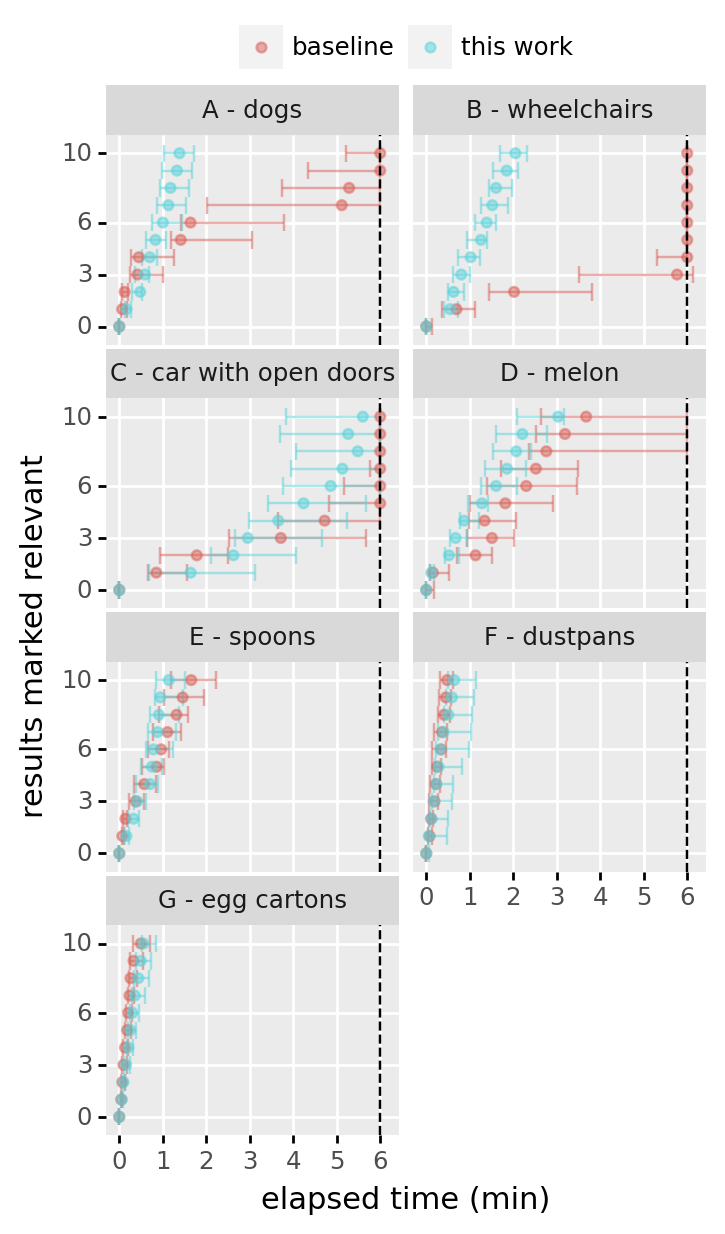

In [105]:
PIL.Image.open('./user_study.png')